In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [28]:
smiles = 'CN(C)P1OC2=[C@](C(C=CC=C3)=C3C=C2)[C@]4=C(C=CC5=C4C=CC=C5)O1'
match_smarts = '[#15]1-,:[#8]-,:[#6]-,:[#6]-,:[#6]-,:[#6]-,:[#8]-,:1'
mol = AllChem.AddHs(Chem.MolFromSmiles(smiles))

'''
This tag is used to insure the correct axial chirality
'''
axial_tag = -1
maxattempts = 10000
for i in range(maxattempts):
    AllChem.EmbedMolecule(mol)
    conf = mol.GetConformer()
    match_atoms = mol.GetSubstructMatch(Chem.MolFromSmarts(match_smarts))[2:6]
    dihedral = Chem.rdMolTransforms.GetDihedralDeg(conf,*match_atoms)
    if dihedral * axial_tag > 0:
        AllChem.MMFFOptimizeMolecule(mol)
        break
Chem.MolToMolFile(mol,'./biaryl/mol_1.sdf')

RDKit WARNING: [01:55:02] UFFTYPER: Warning: hybridization set to SP3 for atom 3


The matched atoms at molecule are highlighted below

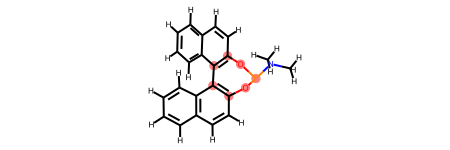

In [29]:
mol